In [1]:
# Csv and Array manuplation libraries
import numpy as np
import pandas as pd

# Visual Libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns 
sns.set_theme()

In [2]:
# Read the data
data = pd.read_csv("../input/epl-football-dataset/football.csv")

# Handle the single missing value in the data with most probable value 
data["region"] = data["region"].fillna(data["region"].value_counts().index[0])
data.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [3]:
# Lets find the type of data available in the dataset 
def varity_type(in_data):
    """
    Collect all the unique datatypes and their corresponding columns
    
    Parameters
    __________
    
    in_data : input dataframe to get the datatypes from
    
    Returns
    _______
    
    Dict of dtypes and columns
    """
    dict_variety = {}
    # Loop over the columns and see their data types
    types = in_data.dtypes
    for i in range(len(types)):
        # Make a new placeholder if not present already
        if types[i] not in dict_variety:
            dict_variety[types[i]] = []
            
        # Add the column name to the dict
        dict_variety[types[i]].append(types.index[i])
    
    # Return the dict
    return dict_variety

In [4]:
diff_types_data = varity_type(in_data=data)
print(diff_types_data)

{dtype('O'): ['name', 'club', 'position', 'fpl_sel', 'nationality'], dtype('int64'): ['age', 'position_cat', 'page_views', 'fpl_points', 'new_foreign', 'age_cat', 'club_id', 'big_club', 'new_signing'], dtype('float64'): ['market_value', 'fpl_value', 'region']}


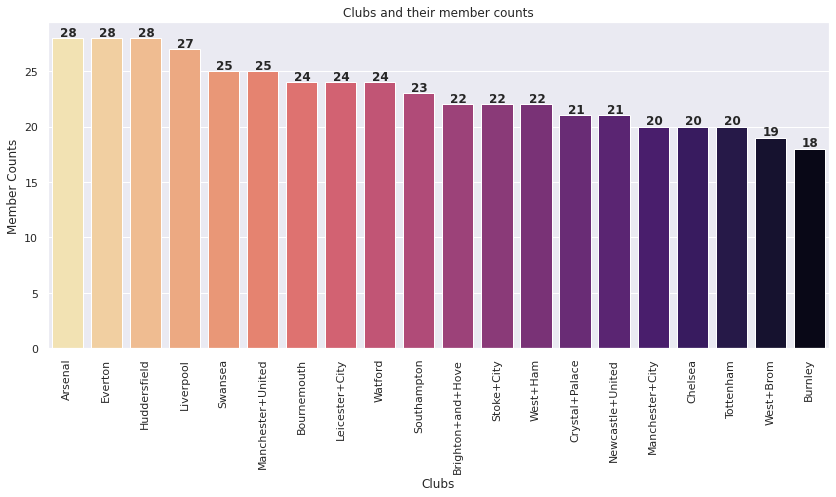

The above barplot plot show the club wih their memeber counts.


In [5]:
# Number of unqiue clubs available along with their player counts currently
club_data = data.club.value_counts()
plt.figure(figsize=(14, 6))
fig = sns.barplot(x=club_data.index, y=club_data.values, palette="magma_r")
for rect in fig.patches:
    fig.text(rect.get_x() + rect.get_width() / 3.8, rect.get_height() + 0.2, "%d" % rect.get_height(), weight='bold')
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.xticks(rotation=90)
plt.title("Clubs and their member counts", fontdict={"fontsize": 12})
plt.xlabel("Clubs", fontdict={"fontsize": 12})
plt.ylabel("Member Counts", fontdict={"fontsize": 12})
plt.show()
print("The above barplot plot show the club wih their memeber counts.")

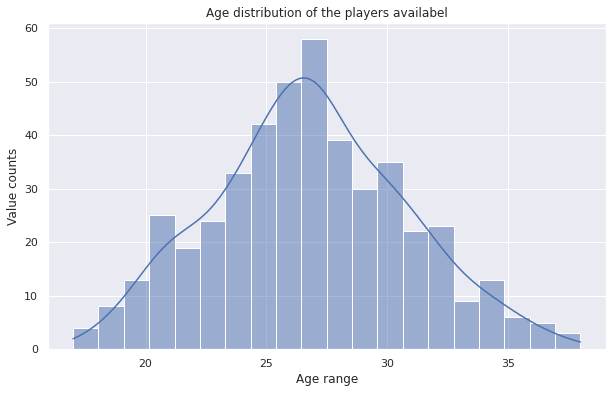

The above histplot shows us the that the age of players ranges from 17 to 38.


In [6]:
# Age didtribution of the players
age_data = data.age
plt.figure(figsize=(10, 6))
fig = sns.histplot(data=age_data, bins=20, kde=True)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.title("Age distribution of the players availabel", fontdict={"fontsize": 12})
plt.xlabel("Age range", fontdict={"fontsize": 12})
plt.ylabel("Value counts", fontdict={"fontsize": 12})
plt.show()
print("The above histplot shows us the that the age of players ranges from 17 to 38.")

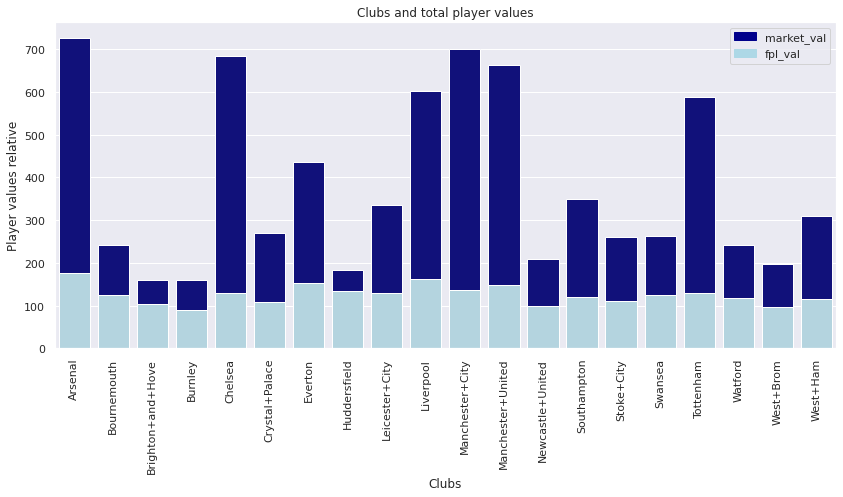

The above graph shows the aggreagated relative market values and fpl values for each of the club in order to find if higher market value leads to higher fpl values and vice-versa.


In [7]:
# Clubs and their total player value 
tp_val = data[["club", "market_value", "fpl_value"]].groupby(by="club").agg(sum).reset_index()
plt.figure(figsize=(14, 6))
fig = sns.barplot(x=tp_val.club, y=tp_val.market_value + tp_val.fpl_value, color="darkblue")
fig = sns.barplot(x=tp_val.club, y=tp_val.fpl_value, color="lightblue")
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.xticks(rotation=90)
plt.title("Clubs and total player values", fontdict={"fontsize": 12})
plt.xlabel("Clubs", fontdict={"fontsize": 12})
plt.ylabel("Player values relative", fontdict={"fontsize": 12})
top_bar = mpatches.Patch(color='darkblue', label='market_val')
bottom_bar = mpatches.Patch(color='lightblue', label='fpl_val')
plt.legend(handles=[top_bar, bottom_bar])
plt.show()
print("The above graph shows the aggreagated relative market values and fpl values for each of the club in order to find if higher market value leads to higher fpl values and vice-versa.")

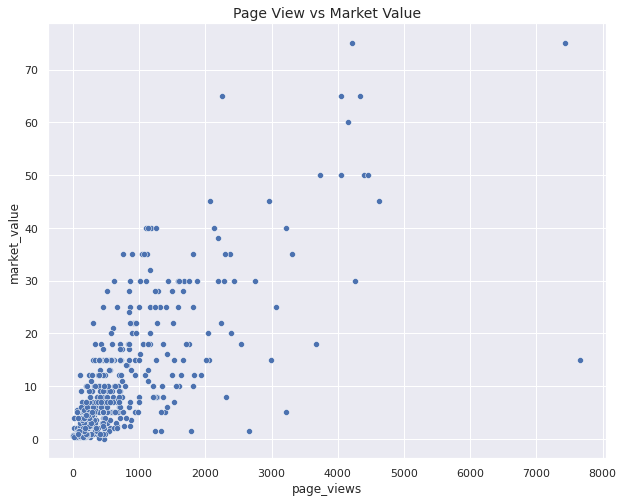

From the scatterplot is is clear that page view does not directly impact maket value.


In [8]:
# Does higher page view translates to more market value 
plt.figure(figsize=(10,8))
sns.scatterplot(x="page_views", y="market_value", data=data)
plt.title("Page View vs Market Value", fontdict={"fontsize":14})
plt.show()
print("From the scatterplot is is clear that page view does not directly impact maket value.")

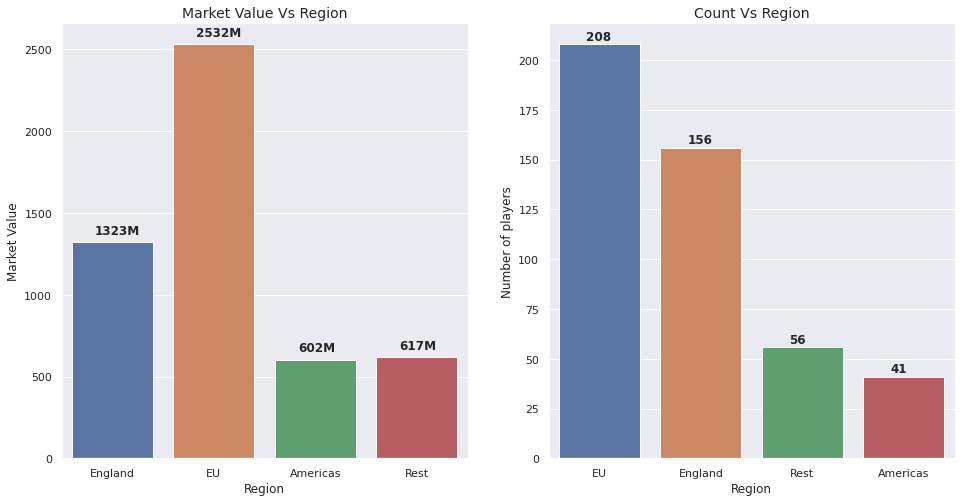

We can clearly see from the graph that despie England having more number of players their combined market value is lower than players from EU despie being lower in number meaning that players from EU are more sort out by the recruiters.


In [9]:
# Most popular region and their total player value 
region_data = data[["region", "market_value"]].groupby("region").agg(sum).reset_index()
region_data["region"] = region_data["region"].astype(int).map({1: "England", 2: "EU", 3: "Americas", 4: "Rest"})
count_data = data["region"].value_counts().reset_index()
count_data["index"] = count_data["index"].astype(int).map({1: "England", 2: "EU", 3: "Americas", 4: "Rest"})

# Make the plots 
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(16, 8))

# Plot 1 
fig_1 = sns.barplot(x=region_data["region"], y=region_data["market_value"], ax=axes[0])
axes[0].set_title("Market Value Vs Region", fontdict={"fontsize": 14})
axes[0].set_xlabel("Region", fontdict={"fontsize": 12})
axes[0].set_ylabel("Market Value", fontdict={"fontsize": 12})
for rect in fig_1.patches:
    fig_1.text(rect.get_x() + rect.get_width() / 3.5, rect.get_height() + 50, "%dM" % rect.get_height(), weight='bold')

# Plot 2
fig_2 = sns.barplot(x=count_data["index"], y=count_data["region"], ax=axes[1])
axes[1].set_title("Count Vs Region", fontdict={"fontsize": 14})
axes[1].set_xlabel("Region", fontdict={"fontsize": 12})
axes[1].set_ylabel("Number of players", fontdict={"fontsize": 12})
for rect in fig_2.patches:
    fig_2.text(rect.get_x() + rect.get_width() / 3, rect.get_height() + 2, "%d" % rect.get_height(), weight='bold')

# Show the plot 
plt.show()
print("We can clearly see from the graph that despie England having more number of players their combined market value is lower than players from EU despie being lower in number meaning that players from EU are more sort out by the recruiters.")

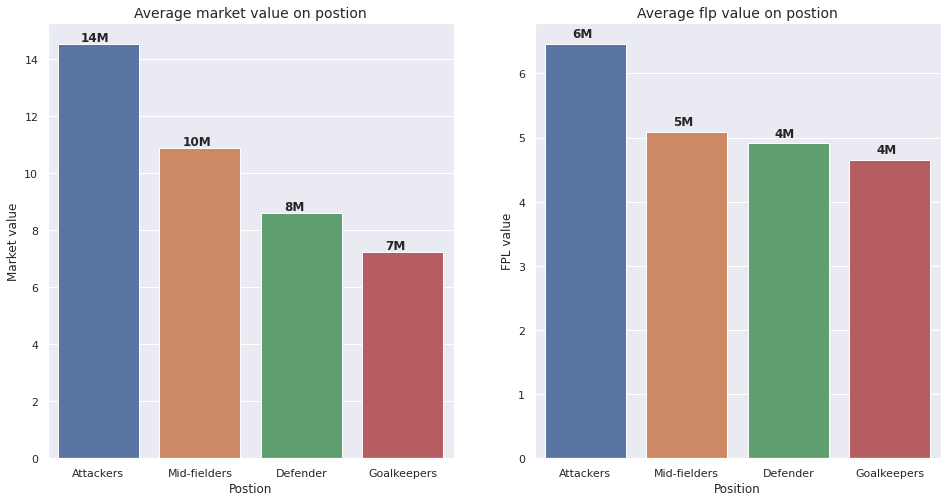

We can see clearly that attackers on average have more market value followed by mid-fileder and then defenders and finally goalkeepers


In [10]:
# Most wealthiest postion 
position_data = data[["position_cat", "market_value", "fpl_value"]].groupby(by="position_cat").agg(np.mean).reset_index()
position_data["position_cat"] = position_data["position_cat"].astype(int).map({1: "Attackers",
                                                                               2: "Mid-fielders",
                                                                               3: "Defender",
                                                                               4: "Goalkeepers"})

# Make the plots 
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(16, 8))

# Plot 1 
fig_1 = sns.barplot(x=position_data["position_cat"], y=position_data["market_value"], ax=axes[0])
axes[0].set_title("Average market value on postion", fontdict={"fontsize": 14})
axes[0].set_xlabel("Postion", fontdict={"fontsize": 12})
axes[0].set_ylabel("Market value", fontdict={"fontsize": 12})
for rect in fig_1.patches:
    fig_1.text(rect.get_x() + rect.get_width() / 3.5, rect.get_height() + 0.1, "%dM" % rect.get_height(), weight='bold')

# Plot 2
fig_2 = sns.barplot(x=position_data["position_cat"], y=position_data["fpl_value"], ax=axes[1])
axes[1].set_title("Average flp value on postion", fontdict={"fontsize": 14})
axes[1].set_xlabel("Position", fontdict={"fontsize": 12})
axes[1].set_ylabel("FPL value", fontdict={"fontsize": 12})
for rect in fig_2.patches:
    fig_2.text(rect.get_x() + rect.get_width() / 3, rect.get_height() + 0.1, "%dM" % rect.get_height(), weight='bold')

# Show the plot 
plt.show()
print("We can see clearly that attackers on average have more market value followed by mid-fileder and then defenders and finally goalkeepers")

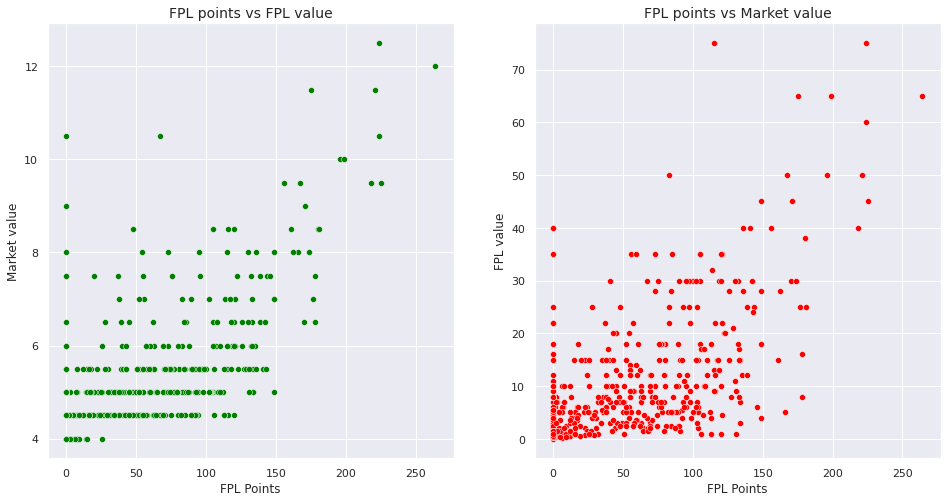

We can see that there is asolutely no relation between FPL point and FPL value but there is some of a positive relation between FPL points and Market value with some outliers


In [11]:
# Do fpl point impact the market value and the fpl value
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(16, 8))

# Plot 1 
fig_1 = sns.scatterplot(x="fpl_points", y="fpl_value", data=data, ax=axes[0], color="green")
axes[0].set_title("FPL points vs FPL value", fontdict={"fontsize": 14})
axes[0].set_xlabel("FPL Points", fontdict={"fontsize": 12})
axes[0].set_ylabel("Market value", fontdict={"fontsize": 12})
# Plot 2
fig_2 = sns.scatterplot(x="fpl_points", y="market_value", data=data, ax=axes[1], color="red")
axes[1].set_title("FPL points vs Market value", fontdict={"fontsize": 14})
axes[1].set_xlabel("FPL Points", fontdict={"fontsize": 12})
axes[1].set_ylabel("FPL value", fontdict={"fontsize": 12})

# Show the plot 
plt.show()
print("We can see that there is asolutely no relation between FPL point and FPL value but there is some of a positive relation between FPL points and Market value with some outliers")